<a href="https://colab.research.google.com/github/2303A52054/GenerativeAI_B39/blob/main/ProjectReport_2054.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
RMSE: 10.87
R² Score: 0.77


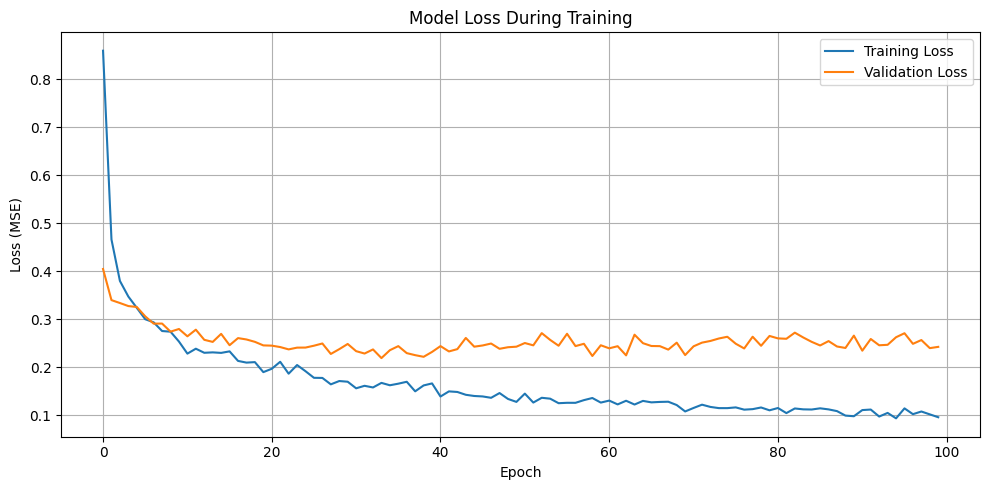

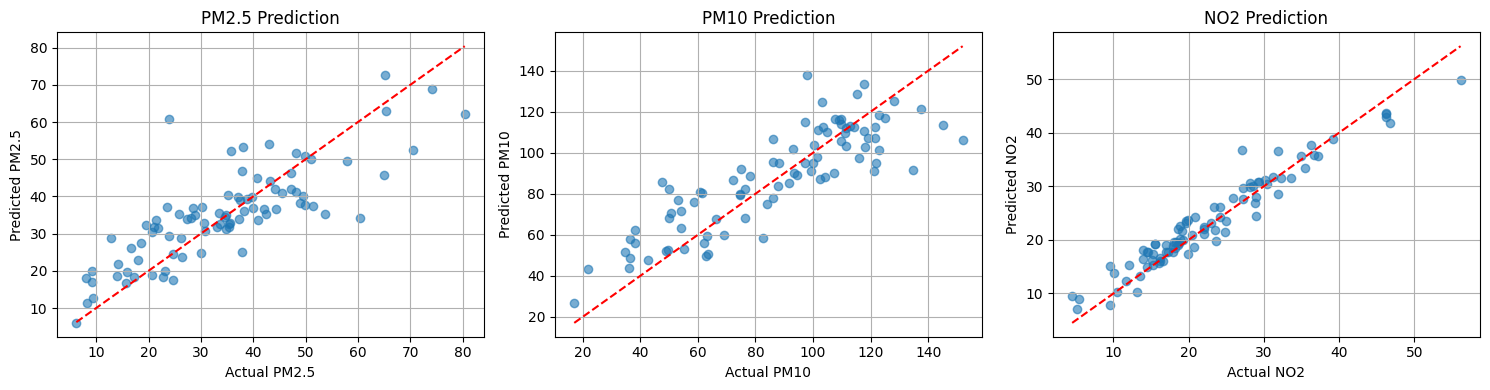

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the Excel file
df = pd.read_excel("/content/Data_Air Pollutant.xlsx", sheet_name="Sheet1")

# Drop datetime columns
df.drop(['From Date', 'To Date'], axis=1, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Define target and features
target_columns = ['PM2.5', 'PM10', 'NO2']
X = df.drop(columns=target_columns)
y = df[target_columns]

# Normalize features and targets
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Build ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1])
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=16, verbose=0)

# Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)
y_test_inv = scaler_y.inverse_transform(y_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot for each pollutant
pollutants = target_columns
plt.figure(figsize=(15, 4))
for i, pollutant in enumerate(pollutants):
    plt.subplot(1, 3, i+1)
    plt.scatter(y_test_inv[:, i], y_pred_inv[:, i], alpha=0.6)
    plt.xlabel(f'Actual {pollutant}')
    plt.ylabel(f'Predicted {pollutant}')
    plt.title(f'{pollutant} Prediction')
    plt.grid(True)
    plt.plot([min(y_test_inv[:, i]), max(y_test_inv[:, i])],
             [min(y_test_inv[:, i]), max(y_test_inv[:, i])], 'r--')

plt.tight_layout()
plt.show()
